# Lista 1

## zadanie 1

In [1]:
import math, matplotlib.pyplot as plt, seaborn, numpy as np
from  scipy.stats import norm, lognorm,  pareto, burr

my_file = open("C:/Users/Maria Nowacka/Desktop/maria/statystyka/dane_lista1.txt", 'r')

data = my_file.read().split()
my_file.close()
# print(data)
x1 = range(1,1001)
y = []
x=[]
for i in data:
    y.append(math.exp(float(i)))
    i = float(i)
    x.append(i)

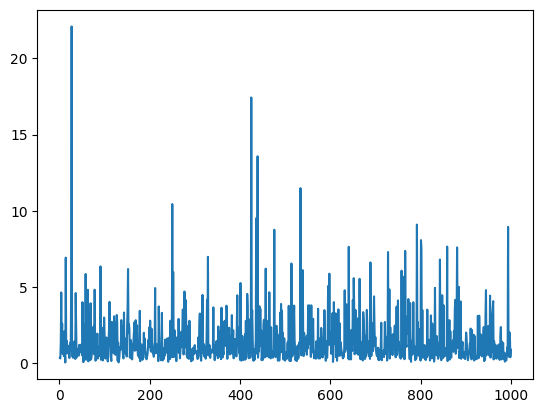

In [2]:
# c
plt.plot(x1, y)
plt.show()


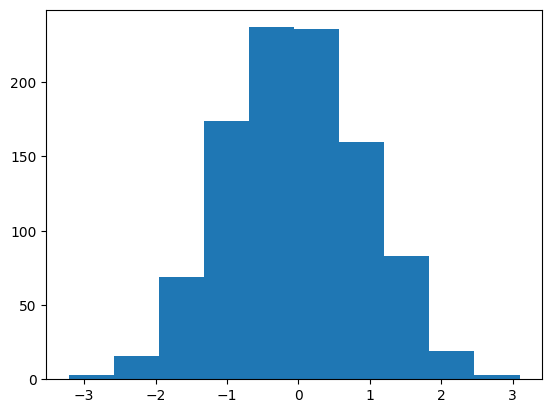

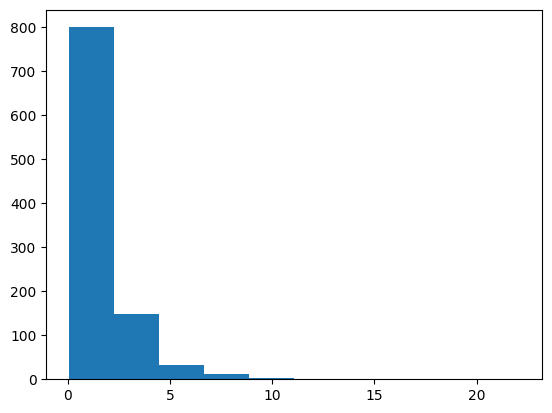

In [3]:
#d
plt.hist(x)
plt.show()
plt.hist(y)
plt.show()

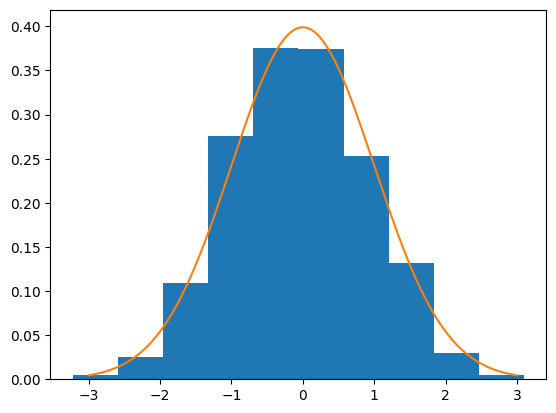

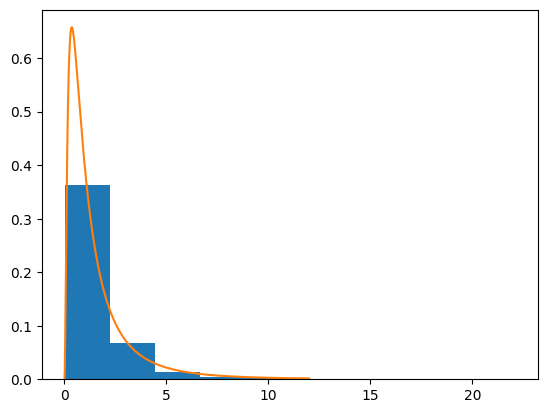

In [4]:
#e
plt.hist(x, density = True)
plt.plot(np.linspace(-3,3,1000), norm.pdf(np.linspace(-3,3,1000)))
plt.show()
plt.hist(y, density = True)
plt.plot(np.linspace(0,12,1000), lognorm.pdf(np.linspace(0,12,1000),1))
plt.show()

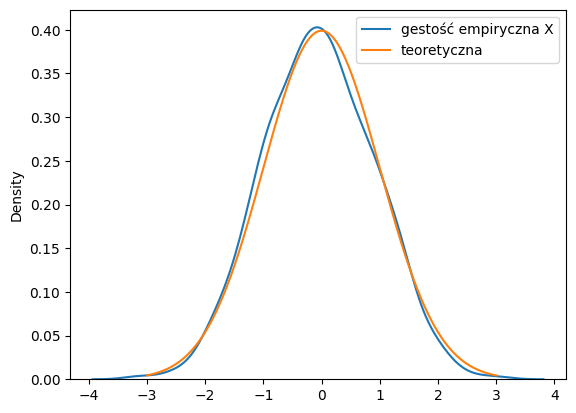

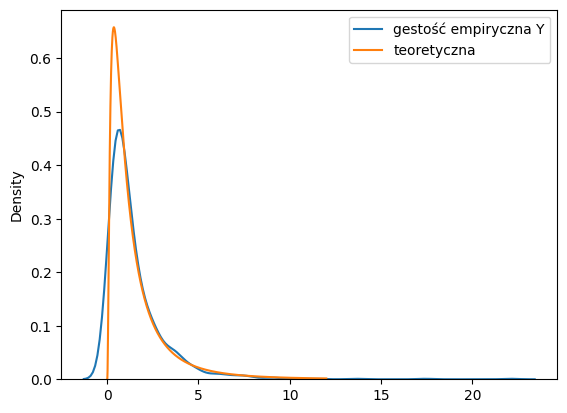

In [5]:
#f
seaborn.kdeplot(x, label= 'gestość empiryczna X')
plt.plot(np.linspace(-3,3,1000), norm.pdf(np.linspace(-3,3,1000)), label='teoretyczna')
plt.legend()
plt.show()
seaborn.kdeplot(y, label= 'gestość empiryczna Y')
plt.plot(np.linspace(0,12,1000), lognorm.pdf(np.linspace(0,12,1000),1), label='teoretyczna')
plt.legend()
plt.show()

## zadanie 2

In [6]:
import random
lambd = 1
alfa = 3
us = []
n=10**3
for u in range(n):
    us.append(random.random())


In [7]:
def F(x,alfa=3, lambd=1):   # dystrybuanta
    return 1-(lambd/(lambd+x)**alfa)
def F_1(u, alfa = 3, lambd = 1):    # dystrybuanta odwrotna
    return lambd*(math.sqrt(1-u)**(-1/alfa)-1)

In [8]:
K = []
k1 = []
for u in us:
    K.append(lambd*(1/(u**(1/alfa))-1))
    k1.append(F_1(u))

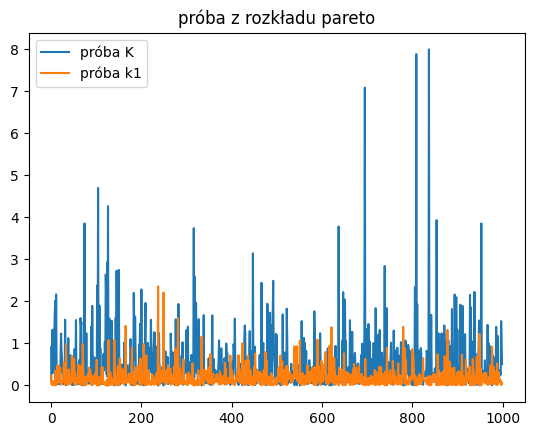

In [9]:
plt.plot(range(n),K, label='próba K')
plt.plot(range(n),k1, label='próba k1')
plt.title('próba z rozkładu pareto')
plt.legend()
plt.show()

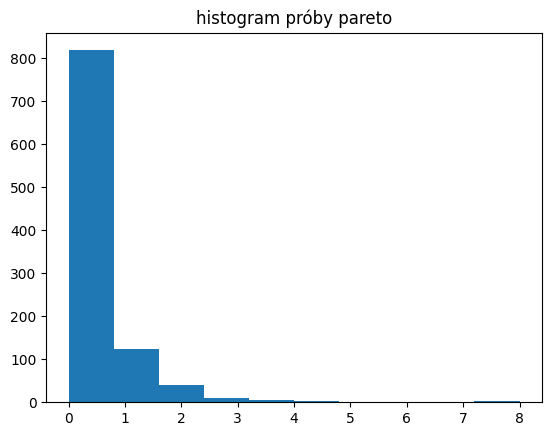

In [10]:
plt.hist(K)
plt.title('histogram próby pareto')
plt.show()

In [11]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n
def drewdemp(X,xss,yss): # dystrybuanta empiryczna
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    plt.plot(x_values, y_values, label='empiryczna')
    plt.title('Wykres dystrybuant')
    plt.plot(xss, yss, label='teoretyczna')
    plt.legend()
    plt.show()


## zadanie 3

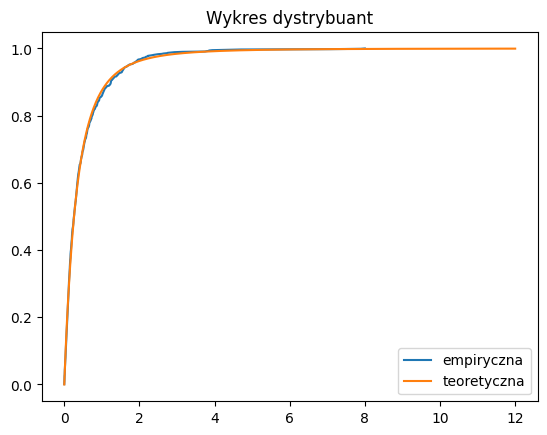

In [12]:
xss = np.linspace(0,12,n)
yss = []
for x in xss:
    yss.append(F(x))
drewdemp(K, xss, yss)

## zadane 4

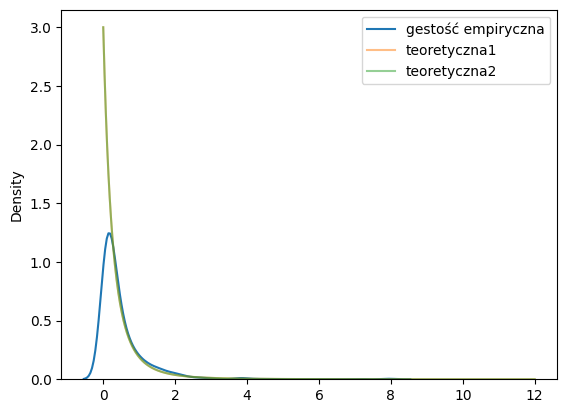

In [18]:
# us - random.random()
# K - próba pareto
from scipy.stats import pareto
def gest(x, lambd = 1, alfa = 3):
    return alfa*lambd**alfa/(lambd+x)**(alfa+1)

xs = np.linspace(0,12,1000)
# plt.hist(K, bins=1000, label='empiryczna')
seaborn.kdeplot(K, label= 'gestość empiryczna')
plt.plot(xs, pareto.pdf(xs, b=3, loc = -1, scale = 1), label = 'teoretyczna1', alpha = 0.5)
plt.plot(xs, [gest(i) for i in xs], label='teoretyczna2', alpha = 0.5)
plt.legend()
plt.show()

## zadanie 5

In [19]:
#a
tau = 2
Z = K
W = [z**(1/tau) for z in Z]

def Fw(x):
    return F(x**tau) 

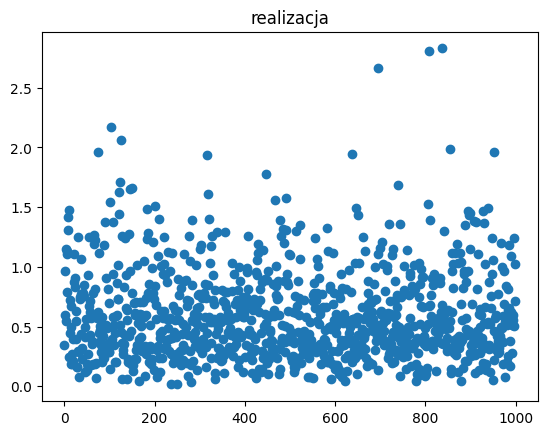

In [20]:
# b
plt.scatter(range(n), W)
plt.title('realizacja')
plt.show()

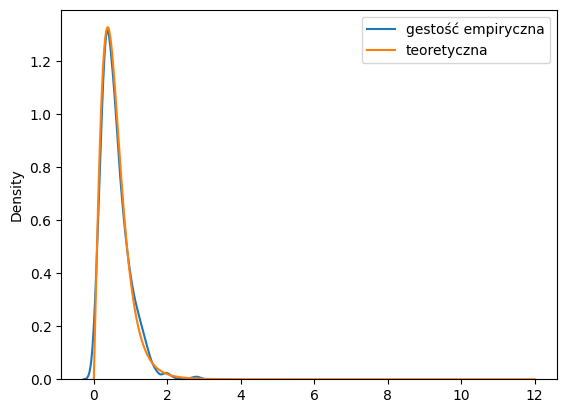

In [22]:
# c
seaborn.kdeplot(W, label= 'gestość empiryczna')
plt.plot(xs, [gest(i**tau)*tau*i**(tau-1) for i in xs], label='teoretyczna')
plt.legend()
plt.show()

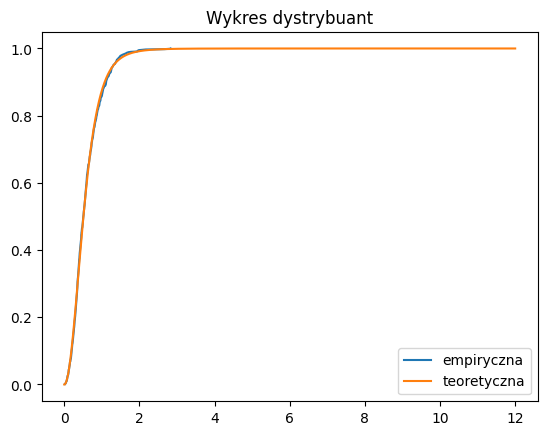

In [21]:
# d
Fbt = [Fw(b) for b in np.linspace(0,12,n)]
drewdemp(W, np.linspace(0,12,n), Fbt)